In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd


# Hypothesis 1 : Approach

1. Read the countries and internet usage files<br>
2. Get the population and the country names colums, and internet usage for each country from second dataset
3. from first datset determine the countries with largest population. like top 10 or top 20
4. check the results of 3 with internet usage.
5. Group by regions and get the regions with higfhest population.


In [5]:
if __name__ == '__main__':
    secure_servers = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Secure_Internet_Servers_Worldwide.xlsx")
    internet_users = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Share_of_the_Internet_users_Worldwide.xlsx")
    country_profiles = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/Country_Profiles.csv")
    Data_breach = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/PRC_Data_Breach_Chronology.csv")
    mental_health_df = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/number_with_depression_by_country.csv")
    worldwide_internet_usage = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Individuals_using_the_Internet(Uptill 2019).xls")

In [6]:
shapefile = 'C:/Users/admin/Desktop/final_project_2020Sp/110m_cultural/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.head()

,ADMIN,ADM0_A3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
internet_users

,Source,Location,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"ITU, Global ICT Developments",Qatar,4.863679,24.733494,69.00,69.000000,69.300000,85.300000,91.490000,92.884826,95.124662,97.388849,99.652849
1,"ITU, Global ICT Developments",Kuwait,6.731396,25.926108,61.40,65.769071,70.450000,75.460000,78.700000,72.000000,78.367384,100.000000,99.599993
2,"ITU, Global ICT Developments",Iceland,44.470534,87.000000,93.39,94.819687,96.209800,96.546800,98.160000,98.200000,98.240016,98.260000,99.010954
3,"ITU, Global ICT Developments",Bahrain,6.153733,21.303734,55.00,76.999967,88.000000,90.000040,90.503133,93.478301,97.999981,95.878136,98.643429
4,"ITU, Global ICT Developments",United Arab Emirates,23.625301,40.000000,68.00,78.000000,84.999992,88.000000,90.400000,90.500000,90.600007,94.819923,98.450002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,"ITU, Global ICT Developments",Tonga,2.434398,4.907783,16.00,25.000000,30.000000,32.753961,35.954441,38.651272,39.950000,41.248728,NaN
194,"ITU, Global ICT Developments",Turkmenistan,0.133282,0.997257,3.00,5.000000,7.195800,9.600000,12.200000,14.996775,17.990324,21.250997,NaN
195,"ITU, Global ICT Developments",Vanuatu,2.108337,5.082334,8.00,9.200000,10.598000,11.300000,18.800000,22.351405,24.000000,25.719788,NaN
196,"ITU, Global ICT Developments",Venezuela,3.359597,12.552998,37.37,40.220000,49.050083,54.900000,57.000000,64.000000,60.000000,72.000000,NaN


In [8]:
country_profiles.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34.0,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [9]:
country_population = country_profiles[['country','Region','Population in thousands (2017)']]

In [10]:
country_population.head()

,country,Region,Population in thousands (2017)
0,Afghanistan,SouthernAsia,35530
1,Albania,SouthernEurope,2930
2,Algeria,NorthernAfrica,41318
3,American Samoa,Polynesia,56
4,Andorra,SouthernEurope,77


In [11]:
internet_usage = internet_users[['Location','2017']]

In [12]:
internet_usage

,Location,2017
0,Qatar,97.388849
1,Kuwait,100.000000
2,Iceland,98.260000
3,Bahrain,95.878136
4,United Arab Emirates,94.819923
...,...,...
193,Tonga,41.248728
194,Turkmenistan,21.250997
195,Vanuatu,25.719788
196,Venezuela,72.000000


In [13]:
insights1 = country_population.merge(internet_usage,left_on="country",right_on ="Location",how ="left")

In [14]:
insights1


,country,Region,Population in thousands (2017),Location,2017
0,Afghanistan,SouthernAsia,35530,Afghanistan,13.500000
1,Albania,SouthernEurope,2930,Albania,71.847041
2,Algeria,NorthernAfrica,41318,Algeria,47.691055
3,American Samoa,Polynesia,56,NaN,NaN
4,Andorra,SouthernEurope,77,Andorra,91.567467
...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,12,NaN,NaN
225,Western Sahara,NorthernAfrica,553,NaN,NaN
226,Yemen,WesternAsia,28250,Yemen,26.718355
227,Zambia,EasternAfrica,17094,Zambia,NaN


In [15]:
insights1 = insights1[pd.notnull(insights1["Location"])]

In [16]:
insights1 = insights1.sort_values(by = ["Population in thousands (2017)"], ascending =False)

In [17]:
insights1

,country,Region,Population in thousands (2017),Location,2017
45,China,EasternAsia,1409517,China,54.300000
95,India,SouthernAsia,1339180,India,34.450000
96,Indonesia,South-easternAsia,263991,Indonesia,32.292442
28,Brazil,SouthAmerica,209288,Brazil,67.471285
153,Pakistan,SouthernAsia,197016,Pakistan,15.510000
...,...,...,...,...,...
133,Monaco,WesternEurope,39,Monaco,97.052977
117,Liechtenstein,WesternEurope,38,Liechtenstein,98.100000
175,San Marino,SouthernEurope,33,San Marino,60.182301
211,Tuvalu,Polynesia,11,Tuvalu,49.318339


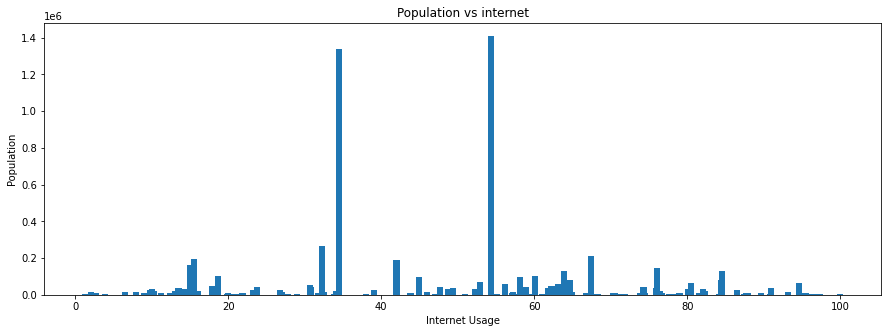

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
frequency = insights1["Population in thousands (2017)"]
points = insights1["2017"]
width = 0.4
ax.bar(points, frequency)


ax.set_title('Population vs internet')
ax.set_xlabel('Internet Usage')
ax.set_ylabel('Population')
plt.show()

In [19]:
#Creating a world map by merging the datasets

In [20]:
merged = gdf.merge(insights1, left_on = 'ADMIN', right_on = 'country',how="outer")

In [21]:
#Some countries could be missing bcoz of diff names in diff datasets ex:Russia, United Sates, Greenland, European countries,African countries

Text(0.5, 1.0, 'Internet Usage over the world')

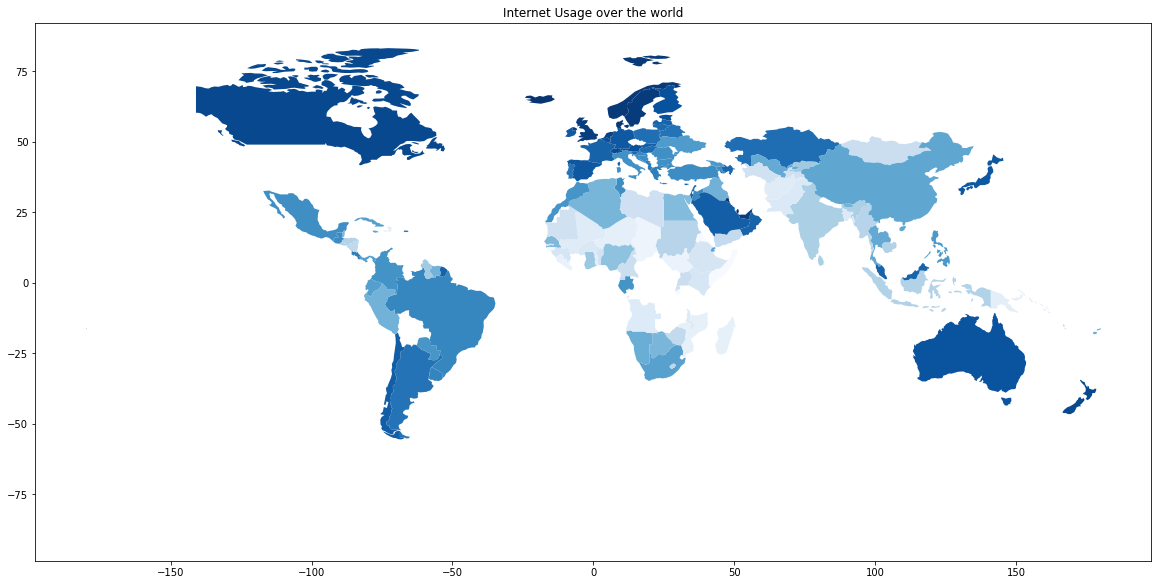

In [22]:
#Reference: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
variable = "2017"
vmin, vmax = 120, 220
#fig, ax = plt.subplots(1, figsize=(10, 6))
#fig =merged.subplot(column=variable, cmap="PuRd", figsize=(10, 6))
#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="PuRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap="Blues",figsize=(20,20))
plt.title("Internet Usage over the world")
#try adding interactivity

In [23]:
#Hypothesis 1.2 Mental health vs Internet usage

#Mental health and neurodevelopment disorders (not including alcohol and drug use disorders) as a share of total disease burden. 
#Disease burden is measured in DALYs (Disability-Adjusted Life Years). 
#DALYs measure total burden of disease - both from years of life lost and years lived with a disability. 
#One DALY equals one lost year of healthy life.

In [25]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# Hypothesis 1.3

In [26]:
country_GDP = country_profiles[['country','GDP per capita (current US$)','Population in thousands (2017)']]

In [27]:
country_GDP

,country,GDP per capita (current US$),Population in thousands (2017)
0,Afghanistan,623.2,35530
1,Albania,3984.2,2930
2,Algeria,4154.1,41318
3,American Samoa,-99.0,56
4,Andorra,39896.4,77
...,...,...,...
224,Wallis and Futuna Islands,-99.0,12
225,Western Sahara,-99.0,553
226,Yemen,1106.4,28250
227,Zambia,1311.1,17094


In [28]:
# sum_int_users = internet_users[["2000","2005","2010","2011","2012","2013","2014","2015","2016","2017","2018"]]

# df['sum'] = df.drop('gid', axis=1).sum(axis=1)
# print (df)
#sum of percentages
sum_int_users = internet_users.iloc[:,1:].sum(axis=1)

In [29]:
average_int_usage = sum_int_users.div(11)

In [30]:
average_int_usage

0      72.612578
1      66.763996
2      91.300708
3      73.996405
4      77.035929
         ...    
193    24.263689
194     8.396767
195    12.469078
196    40.950243
197    14.887779
Length: 198, dtype: float64

In [31]:
location = internet_users["Location"]

In [32]:
location

0                     Qatar
1                    Kuwait
2                   Iceland
3                   Bahrain
4      United Arab Emirates
               ...         
193                   Tonga
194            Turkmenistan
195                 Vanuatu
196               Venezuela
197                   Yemen
Name: Location, Length: 198, dtype: object

In [33]:
insights2= pd.concat([location, average_int_usage], axis=1)

In [34]:
insights2.columns = ["Country","Average Internet usage over the years"]

In [35]:
insights2

,Country,Average Internet usage over the years
0,Qatar,72.612578
1,Kuwait,66.763996
2,Iceland,91.300708
3,Bahrain,73.996405
4,United Arab Emirates,77.035929
...,...,...
193,Tonga,24.263689
194,Turkmenistan,8.396767
195,Vanuatu,12.469078
196,Venezuela,40.950243


In [36]:
GDP_vs_int_usage = insights2.merge(country_GDP,left_on="Country",right_on="country",how="left")

In [37]:
GDP_vs_int_usage

,Country,Average Internet usage over the years,country,GDP per capita (current US$),Population in thousands (2017)
0,Qatar,72.612578,Qatar,73653.4,2639.0
1,Kuwait,66.763996,Kuwait,29303.9,4136.0
2,Iceland,91.300708,Iceland,50936.0,335.0
3,Bahrain,73.996405,Bahrain,22600.2,1493.0
4,United Arab Emirates,77.035929,United Arab Emirates,40438.8,9400.0
...,...,...,...,...,...
193,Tonga,24.263689,Tonga,3784.5,108.0
194,Turkmenistan,8.396767,Turkmenistan,6996.7,5758.0
195,Vanuatu,12.469078,Vanuatu,2783.0,276.0
196,Venezuela,40.950243,NaN,NaN,NaN


In [38]:
#Let's make a plot of GDP vs Average internet Usage
#reference for plotly : https://plotly.com/python/bubble-charts/

In [39]:
import plotly.express as px


fig = px.scatter(GDP_vs_int_usage, x="GDP per capita (current US$)", y="Average Internet usage over the years",
        color="Country",size= "Average Internet usage over the years",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

# Hypothesis 2

We expect that countries with higher internet usage are more prone to security breaches.
1. internet users
2. security breaches

In [40]:
data_breaches = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/databreaches.csv",encoding='latin-1')

In [41]:
data_breaches.head()

,Date,Notify,URL,IP,Country,OS,WebServer,Encoding,Lang
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,NaN,UNKNOWN,Unknown,Unknown,utf-8,NaN
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,NaN,COSTARICA,Unknown,Unknown,NaN,NaN
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,NaN,UNITED STATES,Unknown,Unknown,iso-8859-1,Helvetica
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,utf-8,NaN
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,windows-1252,Times New Roman


Internet usage is defined as internet users as a percentage of the population.

In [42]:
data_breaches_info = data_breaches[["Date","Country"]]

In [43]:
data_breaches_info

,Date,Country
0,1998-01-02,UNKNOWN
1,1998-01-03,COSTARICA
2,1998-01-04,UNITED STATES
3,1998-01-04,AFGHANISTAN
4,1998-01-04,AFGHANISTAN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [44]:
data_breaches_info["Date"] = data_breaches_info[(data_breaches["Date"] >'2000-1-1')]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
data_breaches_info

,Date,Country
0,NaN,UNKNOWN
1,NaN,COSTARICA
2,NaN,UNITED STATES
3,NaN,AFGHANISTAN
4,NaN,AFGHANISTAN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [48]:
#filtering out nan values

In [46]:
data_breaches_info = data_breaches_info.dropna()

In [ ]:
#only breaches data from 2020.

In [57]:
data_breaches_info

,Date,Country
3139,2000-10-01,BRAZIL
3140,2000-10-01,NICARAGUA
3141,2000-10-01,GERMANY
3143,2000-10-01,UNKNOWN
3144,2000-10-01,UNKNOWN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [84]:
data_breaches_info["Country"] = data_breaches_info["Country"].astype(str)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
data_breaches_info.dtypes

Date       object
Country    object
dtype: object

In [111]:
data_breaches_per_country = pd.DataFrame(data_breaches_info["Country"].value_counts().rename_axis('Country').reset_index(name='No. of Data Breaches'))

In [112]:
data_breaches_per_country

,Country,No. of Data Breaches
0,b'United States',29928
1,b'UNITED STATES',28294
2,b'UNKNOWN',8555
3,b'Spain',5665
4,b'BRAZIL',5088
...,...,...
350,b'PAPUA NEW GUINEA',1
351,b'NORFOLKISLAND',1
352,b'TURKMENISTAN',1
353,b'NETHERLANDSANTILLES',1


In [115]:
 #stackoverflow #https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

Filtering out rows that have country as Unknown

In [117]:
data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("b'UNKNOWN'")]

In [122]:
data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("b'Unknown")]

In [123]:
data_breaches_per_country

,Country,No. of Data Breaches
0,b'United States',29928
1,b'UNITED STATES',28294
3,b'Spain',5665
4,b'BRAZIL',5088
5,b'Germany',4088
...,...,...
350,b'PAPUA NEW GUINEA',1
351,b'NORFOLKISLAND',1
352,b'TURKMENISTAN',1
353,b'NETHERLANDSANTILLES',1


In [129]:
#df.Geo.str.replace("[({':]", "") #https://python-forum.io/Thread-Removing-characters-from-columns-in-data-frame
data_breaches_per_country["Country"] = data_breaches_per_country.Country.str.replace("[b']","")

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
1,UNITED STATES,28294
3,Spain,5665
4,BRAZIL,5088
5,Germany,4088
...,...,...
350,PAPUA NEW GUINEA,1
351,NORFOLKISLAND,1
352,TURKMENISTAN,1
353,NETHERLANDSANTILLES,1


# Convert the countries to lower case

dropping UNITED  States as it has a lower value

In [137]:
data_breaches_per_country =data_breaches_per_country[data_breaches_per_country.Country != "UNITED STATES"]

In [138]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
3,Spain,5665
4,BRAZIL,5088
5,Germany,4088
6,France,3681
...,...,...
350,PAPUA NEW GUINEA,1
351,NORFOLKISLAND,1
352,TURKMENISTAN,1
353,NETHERLANDSANTILLES,1


In [124]:
insights2

,Country,Average Internet usage over the years
0,Qatar,72.612578
1,Kuwait,66.763996
2,Iceland,91.300708
3,Bahrain,73.996405
4,United Arab Emirates,77.035929
...,...,...
193,Tonga,24.263689
194,Turkmenistan,8.396767
195,Vanuatu,12.469078
196,Venezuela,40.950243


In [142]:
data_breach_int_users = insights2.merge(data_breaches_per_country,left_on="Country",right_on="Country",how= "left")

In [143]:
data_breach_int_users

,Country,Average Internet usage over the years,No. of Data Breaches
0,Qatar,72.612578,NaN
1,Kuwait,66.763996,2.0
2,Iceland,91.300708,28.0
3,Bahrain,73.996405,NaN
4,United Arab Emirates,77.035929,NaN
...,...,...,...
193,Tonga,24.263689,NaN
194,Turkmenistan,8.396767,NaN
195,Vanuatu,12.469078,4.0
196,Venezuela,40.950243,10.0


In [144]:
data_breach_int_users = data_breach_int_users.dropna()

In [145]:
data_breach_int_users

,Country,Average Internet usage over the years,No. of Data Breaches
1,Kuwait,66.763996,2.0
2,Iceland,91.300708,28.0
5,Denmark,88.305825,164.0
7,Norway,90.348284,195.0
9,United Kingdom,82.948063,1894.0
...,...,...,...
191,Tajikistan,12.212481,1.0
192,Tanzania,7.333381,3.0
195,Vanuatu,12.469078,4.0
196,Venezuela,40.950243,10.0


In [158]:
fig = px.scatter(data_breach_int_users, x="No. of Data Breaches", y="Average Internet usage over the years")

fig.show()


# Hypothesis 3

 higher secure internet servers would have lesser cases of data breaches.

In [161]:
 secure_servers =  secure_servers[["Country","2018"]]

In [164]:
secure_servers = secure_servers.dropna()

In [165]:
secure_servers

,Country,2018
0,United States,21517004.0
1,Germany,4676435.0
2,United Kingdom,1811830.0
3,Netherlands,1733183.0
4,Japan,1476696.0
...,...,...
190,Guinea-Bissau,4.0
191,Central African Republic,3.0
192,Nauru,1.0
193,Tuvalu,1.0


In [166]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
3,Spain,5665
4,BRAZIL,5088
5,Germany,4088
6,France,3681
...,...,...
350,PAPUA NEW GUINEA,1
351,NORFOLKISLAND,1
352,TURKMENISTAN,1
353,NETHERLANDSANTILLES,1


In [167]:
server_data_breach = secure_servers.merge(data_breaches_per_country,left_on="Country",right_on="Country",how="left")

In [169]:
server_data_breach = server_data_breach.dropna()

In [175]:
server_data_breach.columns = ["Country","No.of Secure Servers","No. of Data Breaches"]

In [176]:
server_data_breach

,Country,No.of Secure Servers,No. of Data Breaches
0,United States,21517004.0,29928.0
1,Germany,4676435.0,4088.0
2,United Kingdom,1811830.0,1894.0
3,Netherlands,1733183.0,1097.0
4,Japan,1476696.0,491.0
...,...,...,...
154,Samoa,105.0,3.0
161,Togo,61.0,1.0
163,Vanuatu,58.0,4.0
166,Burkina Faso,50.0,2.0


In [177]:
fig = px.treemap(server_data_breach, path=['Country'], values='No.of Secure Servers',
                  color='No. of Data Breaches', hover_data=['Country'],
                  color_continuous_scale='RdBu',
                  )
fig.show()